# PyTorch basic for Reinforcement Learning

## 1D Tensor Operation

- tensor 생성

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'1.10.0+cu111'

- 초기화되지 않은 5x3 행렬을 생성

In [3]:
x = torch.ones(5, 3)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


- 무작위로 초기화된 행렬을 생성

In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.5438, 0.3155, 0.9252],
        [0.5228, 0.1066, 0.0455],
        [0.5170, 0.8041, 0.8561],
        [0.6411, 0.4941, 0.1762],
        [0.0091, 0.4540, 0.8846]])


- dtype이 long이고 0으로 채워진 행렬을 생성합니다:

In [5]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


- python list로 부터 tensor 생성

In [6]:
a = torch.tensor([7, 4, 3, 2, 6])
a.type()

'torch.LongTensor'

- tensor type 명시적 지정 방법

In [7]:
b = torch.FloatTensor([7, 4, 3, 2, 6])
b

tensor([7., 4., 3., 2., 6.])

In [8]:
b.type()

'torch.FloatTensor'

- 참고 : torch.Tensor 는 torch.FloatTensor 의 alias

In [9]:
torch.Tensor([7, 4, 3, 2, 6])

tensor([7., 4., 3., 2., 6.])

In [10]:
torch.Tensor([False, True])

tensor([0., 1.])

In [11]:
torch.tensor([False, True]).dtype

torch.bool

In [12]:
c = torch.tensor([7, 4, 3, 2, 6], dtype=torch.int64)
c.type()

'torch.LongTensor'

In [13]:
d = torch.LongTensor([7, 4, 3, 2, 6])
d

tensor([7, 4, 3, 2, 6])

- 기존 tensor와 같은 shape의 tensor 생성
- 기존 tensor의 dtype을 오버라이드(Override)

In [14]:
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [15]:
x = torch.randn_like(x, dtype=torch.float)    
print(x)                                                       

tensor([[ 1.4136, -0.6558, -1.6500],
        [-1.9449,  0.9666,  1.2320],
        [-0.5244,  2.6565,  0.3715],
        [ 0.5555, -1.4671,  1.7998],
        [ 1.5823,  0.1026, -0.3350]])


## Tensor 의 shape 

- shape

In [16]:
a = torch.Tensor([0, 1, 2, 3, 4])  
a.size()       

torch.Size([5])

In [17]:
a.shape

torch.Size([5])

## reshape
- 크기 변경: tensor의 크기(size)나 모양(shape)을 변경하고 싶다면 torch.view 를 사용

In [18]:
a.view(5, 1)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])

In [19]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)         # -1은 다른 차원들을 사용하여 유추합니다.

print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


## numpy 와 tensor 간의 호환성

- memory 를 공유하므로 하나를 수정하면 나머지에 모두 반영  

In [20]:
np_array = np.array([0., 1., 2., 3., 4., 5.])   # numpy array
tens = torch.from_numpy(np_array)               # torch tensor
tens

tensor([0., 1., 2., 3., 4., 5.], dtype=torch.float64)

In [21]:
back_to_np = tens.numpy()           # numpy array
back_to_np

array([0., 1., 2., 3., 4., 5.])

In [22]:
back_to_np[0] = 100

print(np_array)
print(tens)
print(back_to_np)

[100.   1.   2.   3.   4.   5.]
tensor([100.,   1.,   2.,   3.,   4.,   5.], dtype=torch.float64)
[100.   1.   2.   3.   4.   5.]


## Scalar value 

- 만약 tensor에 하나의 값만 존재한다면, ``.item()`` method를 사용하여 숫자 값을 얻을 수 있습니다.  

In [23]:
x = torch.randn(1)
x.item()

-0.7033752202987671

In [24]:
a = torch.tensor([5., 3., 4., 1.])

print(a[0])
print(a[0].item())

tensor(5.)
5.0


In [25]:
x = torch.randn(2)
print(x)
print()
print(x.numpy())

tensor([-0.0119,  0.5222])

[-0.01186579  0.5221548 ]


## torch tensor를 Python list, Numpy array 로 변환 
- tolist()

In [26]:
list(a)

[tensor(5.), tensor(3.), tensor(4.), tensor(1.)]

In [27]:
a.tolist()

[5.0, 3.0, 4.0, 1.0]

In [28]:
a.numpy()

array([5., 3., 4., 1.], dtype=float32)

## Mean 과 Standard Deviation

In [29]:
a.mean(), a.std()

(tensor(3.2500), tensor(1.7078))

## torch.linspace 와 np.linspace 비교

In [30]:
np_linspace = np.linspace(-2, 2, 5)
np_linspace

array([-2., -1.,  0.,  1.,  2.])

In [31]:
torch_linspace = torch.linspace(-2, 2, 5)
torch_linspace

tensor([-2., -1.,  0.,  1.,  2.])

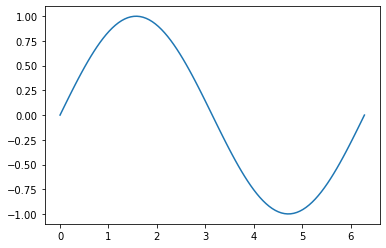

In [32]:
pi_tensor = torch.linspace(0, 2 * np.pi, 100)

plt.plot(pi_tensor, torch.sin(pi_tensor));

## torch.arange 와 np.arange 비교

In [33]:
torch.arange(-100, 100, 0.1).view(-1, 2)

tensor([[-100.0000,  -99.9000],
        [ -99.8000,  -99.7000],
        [ -99.6000,  -99.5000],
        ...,
        [  99.4000,   99.5000],
        [  99.6000,   99.7000],
        [  99.8000,   99.9000]])

In [34]:
np.arange(-100, 100, 0.1).reshape(-1, 2)

array([[-100. ,  -99.9],
       [ -99.8,  -99.7],
       [ -99.6,  -99.5],
       ...,
       [  99.4,   99.5],
       [  99.6,   99.7],
       [  99.8,   99.9]])

## tensor 연산

In [35]:
u = torch.tensor([1, 2])
v = torch.tensor([3, 2])
u + v, u - v

(tensor([4, 4]), tensor([-2,  0]))

In [36]:
2 * v

tensor([6, 4])

In [37]:
u + 2

tensor([3, 4])

In [38]:
torch.dot(u, v)

tensor(7)

In [39]:
u.dot(v)

tensor(7)

In [40]:
torch.add(u, v)

tensor([4, 4])

## 2D Tensor Operation

In [41]:
_2d_tensor = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33], [41, 42, 43]])
_2d_tensor

tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33],
        [41, 42, 43]])

- ndimension  
- shape  
- size()  
- numel (number of elements)

In [42]:
print(_2d_tensor)
print(_2d_tensor.ndimension())
print(_2d_tensor.shape)
print(_2d_tensor.size())
print(_2d_tensor.numel())

tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33],
        [41, 42, 43]])
2
torch.Size([4, 3])
torch.Size([4, 3])
12


## Numpy 와 Tensor 간 호환성은 1D Tensor 와 동일

In [43]:
_2d_np = _2d_tensor.numpy()
_2d_np

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33],
       [41, 42, 43]])

In [44]:
torch.from_numpy(_2d_np)

tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33],
        [41, 42, 43]])

## matrix 간의 연산

In [45]:
x = torch.tensor([[1, 0], [0, 1]])
y = torch.tensor([[2, 1], [1, 2]])
print(x)
print(y)

tensor([[1, 0],
        [0, 1]])
tensor([[2, 1],
        [1, 2]])


- element-wise 연산

In [46]:
x * y

tensor([[2, 0],
        [0, 2]])

## matrix multiplication

In [47]:
x = torch.tensor([[0, 1, 1], [1, 0, 1]])
y = torch.tensor([[1, 1], [1, 1], [-1, 1]])

print(x)
print(y)

tensor([[0, 1, 1],
        [1, 0, 1]])
tensor([[ 1,  1],
        [ 1,  1],
        [-1,  1]])


In [48]:
torch.mm(x, y)

tensor([[0, 2],
        [0, 2]])

### Concatenation

- default - first axis(row 단위)로 concatenate
- column 단위로 concatenate 하려면 axis=1 로 지정

In [49]:
x_1 = torch.randn(2, 3)
x_2 = torch.randn(2, 3)
torch.cat([x_1, x_2])

tensor([[ 0.8642,  1.3290,  1.1815],
        [-0.7305,  1.4961, -0.4573],
        [ 2.7808, -1.7630,  0.5727],
        [-1.1596, -1.1274, -0.5138]])

In [50]:
torch.cat([x_1, x_2], axis=1)

tensor([[ 0.8642,  1.3290,  1.1815,  2.7808, -1.7630,  0.5727],
        [-0.7305,  1.4961, -0.4573, -1.1596, -1.1274, -0.5138]])

### torch.max, torch.argmax

In [51]:
a = torch.randn(4, 4)
a

tensor([[-0.2074,  0.9219, -0.7444,  1.0151],
        [ 0.8157,  0.7163, -0.2468, -0.6838],
        [-0.1499,  1.3610,  1.3140,  0.0782],
        [ 3.1513,  1.0033, -0.2527, -0.6814]])

In [52]:
torch.max(a)

tensor(3.1513)

In [53]:
torch.max(a, dim=1)

torch.return_types.max(values=tensor([1.0151, 0.8157, 1.3610, 3.1513]), indices=tensor([3, 0, 1, 0]))

In [54]:
torch.argmax(a)

tensor(12)

In [55]:
torch.argmax(a, 1)

tensor([3, 0, 1, 0])

## PyTorch 를 이용한 미분

- autograd 패키지는 Tensor의 모든 연산에 대해 자동 미분을 제공   

- ``.requires_grad`` 속성을 True 로 설정하면, 그 tensor에서 이뤄진 모든 연산들을 추적(track)하기 시작  

- 계산이 완료된 후 ``.backward()`` 를 호출하여 모든 변화도(gradient)를 자동으로 계산  

- 이 Tensor의 변화도는 ``.grad`` 속성에 누적  

- Tensor가 기록을 추적하는 것을 중단하게 하려면, ``.detach()`` 를 호출하여 연산 기록으로부터 분리(detach)하여 이후 연산들이 추적되는 것을 방지

- 도함수를 계산하기 위해서는 Tensor 의 ``.backward()`` 를 호출

In [56]:
x = torch.tensor(3.0, requires_grad=True)
x

tensor(3., requires_grad=True)

In [57]:
y = x ** 2
y

tensor(9., grad_fn=<PowBackward0>)

y 를 x 에 대하여 미분  
$$y(x)=x^2$$ 

$$\frac{dy(x=3)}{dx}=2x=6$$

In [58]:
y.backward()

x.grad

tensor(6.)

## 편미분 
$$f(u, v) = uv + u^2$$

$$\frac{\partial{f(u, v)}}{\partial {u}}=v+2u$$
$$\frac{\partial{f(u, v)}}{\partial {v}}=u$$

In [59]:
u = torch.tensor(1.0, requires_grad=True)
v = torch.tensor(2.0, requires_grad=True)

f = u * v + u * 2
f

tensor(4., grad_fn=<AddBackward0>)

In [60]:
f.backward()

In [61]:
print(u.grad)
print(v.grad)

tensor(4.)
tensor(1.)


### CUDA Tensors

- .to 메소드를 사용하여 Tensor를 어떠한 장치로도 옮길 수 있습니다.

In [62]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [63]:
x = torch.ones(2, 2)
x

tensor([[1., 1.],
        [1., 1.]])

In [64]:
x = x.to(device)
x

tensor([[1., 1.],
        [1., 1.]])

In [65]:
y = torch.ones((2, 3), device=device)  # GPU 상에 직접적으로 tensor를 생성
y

tensor([[1., 1., 1.],
        [1., 1., 1.]])